In [ ]:
# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib and for Plottings
import matplotlib.pyplot as plt

# Pickle Library for Saving the Model
import pickle

# RE Library for Regular Expression
import re

# NLTK Library for Natural Language Processing
import nltk
nltk.download('stopwords') # Downloading the Stopwords

# Stopwords for removing stopwords in the Text
from nltk.corpus import stopwords

# PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

# CountVectorizer for Bagging of Words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer

# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# Decision Tree Classifier, Random Forest Classifier and Multinomial Naïve Bayes are Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Accuracy Score and Confusion Matrix is for Analysis of Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
spam = pd.read_csv("/content/spam.csv",encoding='ISO-8859-1')

In [ ]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
spam.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:

spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam.shape

(5572, 2)

In [ ]:


spam.groupby('label').size()

,0
label,
ham,4825
spam,747


<Axes: xlabel='label'>

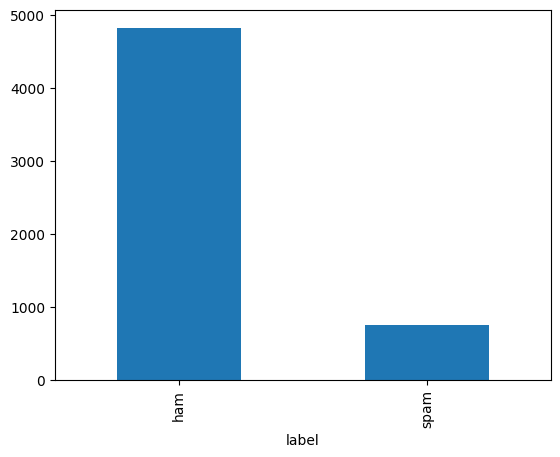

In [ ]:
spam['label'].value_counts().plot(kind='bar')

In [ ]:


ps = PorterStemmer()
corpus = []
for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Printing the first 5 values in the corpus list
corpus[1:6]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

In [ ]:
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)


In [ ]:
#- Multinomial Naïve Bayes
model = MultinomialNB()
model.fit(X_train, Y_train)

MultinomialNB()

In [ ]:

pred = model.predict(X_test)

In [ ]:


# Model  - Multinomial Naïve Bayes
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred))
print("Accuracy: ", accuracy_score(Y_test, pred))

Multinomial Naïve Bayes
Confusion Matrix: 
[[955  10]
 [ 10 140]]
Accuracy:  0.9820627802690582


In [ ]:
filename = "MNB.pkl"
pickle.dump(model, open(filename, 'wb'))



In [ ]:
import pandas as pd
import pickle
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Load data
spam = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')
spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']

# Preprocess text
ps = PorterStemmer()
def preprocess_text(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    return ' '.join(review)

corpus = [preprocess_text(msg) for msg in spam['message']]

# Convert text to numerical features
cv = CountVectorizer(max_features=4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'], drop_first=True).values.ravel()

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
model = MultinomialNB()
model.fit(X_train, Y_train)

# Evaluate the model
Y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))

# Save the model and CountVectorizer
with open("MNB.pkl", 'wb') as file:
    pickle.dump(model, file)

with open("countvectorizer.pkl", 'wb') as file:
    pickle.dump(cv, file)

print("Model and CountVectorizer saved successfully!")


Confusion Matrix:
 [[955  10]
 [ 10 140]]
Accuracy Score: 0.9820627802690582
Model and CountVectorizer saved successfully!


In [22]:
import pandas as pd

# Sample email messages
data = {
    "message": [
        "Congratulations! You've won a $1000 Walmart gift card. Go to http://bit.ly/claim-prize now.",
        "Hey John, are we still meeting at 5 pm today?",
        "Get the best deals on electronics. Limited-time offer. Visit www.deals.com now!",
        "Dear user, your bank account has been compromised. Click the link to secure your details.",
        "Hi Sarah, just checking in. How's everything going?"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("batch_emails.csv", index=False)

print("CSV file 'batch_emails.csv' created successfully!")


CSV file 'batch_emails.csv' created successfully!
